In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
#pip install -U scikit-learn


In [3]:
data=pd.read_csv('chatgpt_paraphrases.csv')
data.head()

,text,paraphrases,category,source
0,What is the step by step guide to invest in sh...,['Can you provide a detailed procedure for inv...,question,quora
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,['Can you tell me about the history of the Koh...,question,quora
2,How can I increase the speed of my internet co...,['What are some ways to enhance my internet sp...,question,quora
3,Why am I mentally very lonely? How can I solve...,['What is causing my mental loneliness and how...,question,quora
4,"Which one dissolve in water quikly sugar, salt...","['Among sugar, salt, methane, and carbon dioxi...",question,quora


In [4]:
category={}
for i in range(len(data)):
    chatgpt=data.iloc[i]["paraphrases"][1:-1].split(', ')
    for j in chatgpt[:1]:
        category[j[1:-1]]='chatgpt'
    category[data.iloc[i]['text']]="human"

In [5]:
data=pd.DataFrame(category.items(),columns=["text","category"])
data=data.sample(frac=1)
data=data[:10000]
data

,text,category
536743,He conveyed his blessing in an inclusive wa,chatgpt
335093,What are some real-world examples of the HTML...,human
164520,How do I synthesize fischer's base?,human
578028,Gaming Nexus considered Twilight Princess's so...,human
631315,Adam Giles is also the Chief Minister of the N...,human
...,...,...
290104,How do I calculate cement sand quantity in 1:6...,human
22597,Which letter is the most frequently occurring ...,chatgpt
800126,I love shopping for suits and shoes -- I keep ...,human
399109,Find the mass moment of inertia of a cube with...,chatgpt


In [6]:
data["category"].value_counts()

category
human      5217
chatgpt    4783
Name: count, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X=data['text']
y=data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [9]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier

In [10]:
lg = LogisticRegression(penalty='l1',solver='liblinear')
sv = SVC(kernel='sigmoid',gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [11]:
from sklearn import metrics

In [12]:
def score_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pr = model.predict(X_test)
    acc_score = metrics.accuracy_score(y_test,pr)
    pre_score = metrics.precision_score(y_test,pr,average="binary", pos_label="chatgpt")
    recall= metrics.recall_score(y_test,pr,average="binary", pos_label="chatgpt")
    f1= metrics.f1_score(y_test,pr,average="binary", pos_label="chatgpt")
    mcc= metrics.matthews_corrcoef(y_test,pr)
    return acc_score,pre_score,recall,f1,mcc

In [13]:
acc_score = {}
pre_score = {}
recall_score={}
f1_score={}
mcc_score={}
clfs= {
    'LR':lg,
    'SVM':sv,
#     'MNB':mnb,
    'DTC':dtc,
    'KNN':knn,
    'RFC':rfc,
    'ETC':etc,
    'ABC':abc,
    'BG':bg,
    'GBC':gbc,
#     'XGB':xgb
}

In [14]:
for name,clf in clfs.items():
    acc_score[name],pre_score[name],recall_score[name],f1_score[name],mcc_score[name] = score_prediction(clf,X_train_tfidf,X_test_tfidf,y_train,y_test)

In [15]:
acc_score

{'LR': 0.717,
 'SVM': 0.7525,
 'DTC': 0.6295,
 'KNN': 0.6595,
 'RFC': 0.741,
 'ETC': 0.77,
 'ABC': 0.7025,
 'BG': 0.7145,
 'GBC': 0.6995}

In [16]:
pre_score

{'LR': 0.7097107438016529,
 'SVM': 0.7635359116022099,
 'DTC': 0.5896043444530644,
 'KNN': 0.658669574700109,
 'RFC': 0.7199612403100775,
 'ETC': 0.7475822050290135,
 'ABC': 0.6890672016048145,
 'BG': 0.6933461909353905,
 'GBC': 0.6589545844044559}

In [17]:
recall_score

{'LR': 0.7067901234567902,
 'SVM': 0.7109053497942387,
 'DTC': 0.7818930041152263,
 'KNN': 0.6213991769547325,
 'RFC': 0.76440329218107,
 'ETC': 0.7952674897119342,
 'ABC': 0.7067901234567902,
 'BG': 0.7397119341563786,
 'GBC': 0.7911522633744856}

In [18]:
f1_score

{'LR': 0.7082474226804125,
 'SVM': 0.7362812999467235,
 'DTC': 0.6722689075630252,
 'KNN': 0.6394917946003176,
 'RFC': 0.7415169660678642,
 'ETC': 0.7706879361914256,
 'ABC': 0.6978161503301168,
 'BG': 0.715778994524639,
 'GBC': 0.7190275829827022}

In [19]:
mcc_score

{'LR': 0.4334958834025904,
 'SVM': 0.5048201973484009,
 'DTC': 0.2791064875180214,
 'KNN': 0.31789709897144214,
 'RFC': 0.4833329364577037,
 'ETC': 0.5414772423005993,
 'ABC': 0.4050766433135331,
 'BG': 0.43049945109490956,
 'GBC': 0.40958619580308936}

In [20]:
etc.fit(X_train_tfidf,y_train)

ExtraTreesClassifier(n_estimators=50, random_state=2)

In [21]:
from sklearn.metrics import confusion_matrix
y_pred =etc.predict(X_test_tfidf)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[773 199]
 [261 767]]


In [22]:
y_test.value_counts()

category
human      1028
chatgpt     972
Name: count, dtype: int64

<Axes: >

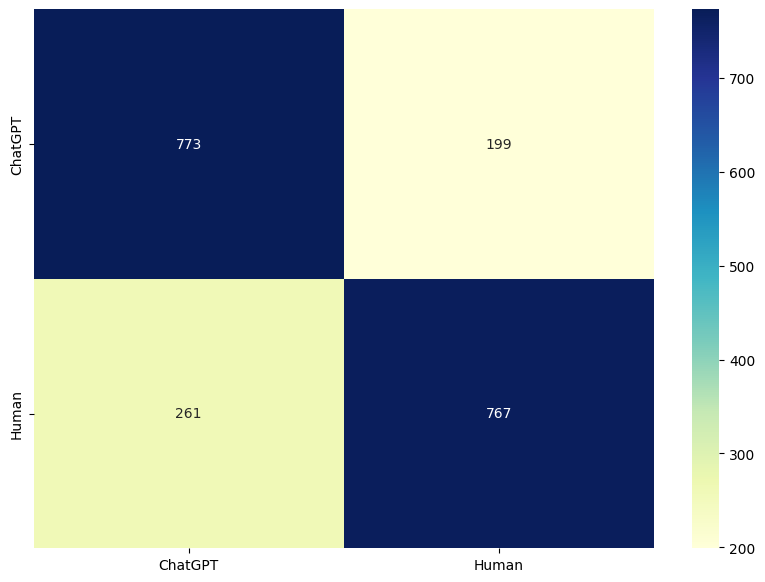

In [28]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(cm, index = [i for i in ["ChatGPT","Human"]],
                  columns = [i for i in ["ChatGPT","Human"]])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="YlGnBu", fmt='g')

In [29]:
from sklearn.metrics import roc_curve,auc
y_prob = etc.predict_proba(X_test_tfidf)[:, 1]

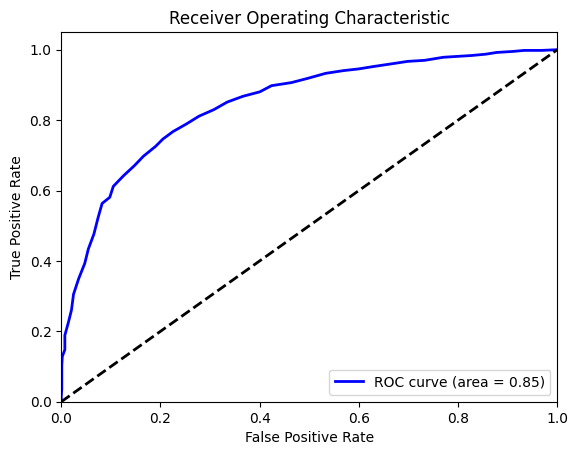

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='human')

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()